CHAPTER 07 딥러닝을 시작합니다  
07-1 인공 신경망

In [1]:
import os
os.environ["KERAS_BACKEND"] = "tensorflow"

import keras
import tensorflow as tf

print("Keras:", keras.__version__)
print("TensorFlow:", tf.__version__)
print("Backend:", keras.config.backend())

2025-11-14 15:33:11.509958: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-11-14 15:33:11.510532: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-11-14 15:33:11.513182: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-11-14 15:33:11.519798: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1763101991.534749  116042 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1763101991.54

Keras: 3.8.0
TensorFlow: 2.18.0
Backend: tensorflow


In [2]:
import keras
(train_input, train_target), (test_input, test_target) = \
    keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [3]:
print(train_input.shape, train_target.shape) # 데이터 크기 확인

(60000, 28, 28) (60000,)


In [4]:
print(test_input.shape, test_target.shape) # 테스트 세트 크기 확인

(10000, 28, 28) (10000,)


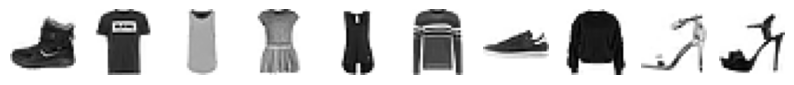

In [5]:
# 10개 샘플 그림으로 출력
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1,10,figsize=(10,10)) # 1행 10열 subplot 생성
# 10개 이미지 반복 표시
for i in range(10):
    axs[i].imshow(train_input[i],cmap='gray_r') # 회색 반전
    axs[i].axis('off') # 축 제거
plt.show()

In [6]:
print(train_target[:10]) # 처음 10개 샘플의 타깃값 확인

[9 0 0 3 0 2 7 2 5 5]


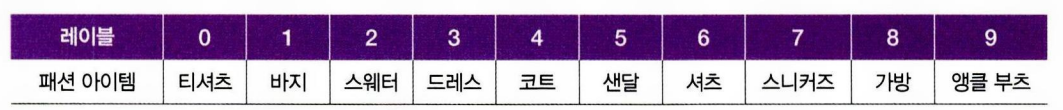

In [7]:
# 레이블 당 샘플 개수 확인
import numpy as np
print(np.unique(train_target, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))


0~9까지 레이블마다 6,000개의 샘플 > 총 6만개   
SGDClassifier 이용해 모델 훈련  
: 1차원 배열, 전처리(표준화) 필요  


In [10]:
train_scaled = train_input/255.0  # 각 픽셀 0~225 사이의 정수값 가지므로 255로 나눠 0~1 사이의 값으로 정규화
train_scaled = train_scaled.reshape(-1,28*28) # 1차원으로 변환
print(train_scaled.shape) # 변환된 train_scaled 크기 확인


(60000, 784)


In [12]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier

sc = SGDClassifier(loss='log_loss', max_iter=5, random_state=42) # 손실함수(로지스틱 회귀), 반복 5회
scores = cross_validate(sc, train_scaled, train_target, n_jobs=-1) # 교차검증 수행, cpu 코어 최대 사용
print(np.mean(scores['test_score'])) # 평균 검증 정확도 출력

/home/user15/anaconda3/envs/ai-study/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:726: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/user15/anaconda3/envs/ai-study/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:726: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/user15/anaconda3/envs/ai-study/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:726: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/user15/anaconda3/envs/ai-study/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:726: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to im

0.8194166666666666


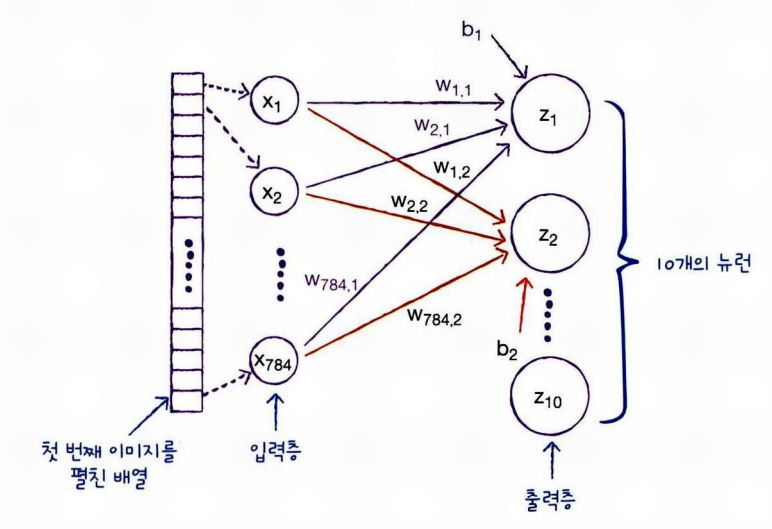

x: 각각의 픽셀   
z: 티셔츠, 바지 등 총 10개의 유닛에 대한 계산값  
w: 가중치  
b: 절편  
가중치와 절편은 각 유닛(클래스)에 따라 다름

[텐서플로]  
구글 딥러닝 라이브러리  
: 저수준 API와 고수준 API(keras)존재  

In [15]:
import keras # 케라스 import
keras.config.backend() # 케라스가 사용중인 백엔드 확인

'tensorflow'

[인공 신경망에서 교차 검증을 잘 사용하지 않고 검증 세트를 덜어내어 사용하는 이유]    
1. 딥러닝 분야의 데이터셋은 충분히 크기 때문에 검증 점수가 안정적  
2. 교차 검증을 수행하기에는 훈련 시간이 너무 오래 걸림  


In [ ]:
# 훈련세트, 검증세트로 나눔
from sklearn.model_selection import train_test_split
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

In [17]:
print(train_scaled.shape, train_target.shape) # 훈련 세트 크기 확인
print(val_scaled.shape, val_target.shape) # 검증 세트 크기 확인

(48000, 784) (48000,)
(12000, 784) (12000,)


In [ ]:
# 케라스 입력층 정의
inputs = keras.layers.Input(shape=(784,)) # 내장함수 input 변수명으로 쓰지 않게 주의

In [ ]:
# 밀집층 정의
dense = keras.layers.Dense(10, activation='softmax') # 뉴런 개수, 뉴런 출력에 적용할 함수

이진분류는 '시그모이드' / 다중 분류는 '소프트맥스'

In [24]:
# 입력층과 밀집층을 가진 신경망 모델 만들기
# 케라스의 Sequential 클래스 사용
model = keras.Sequential([inputs, dense])

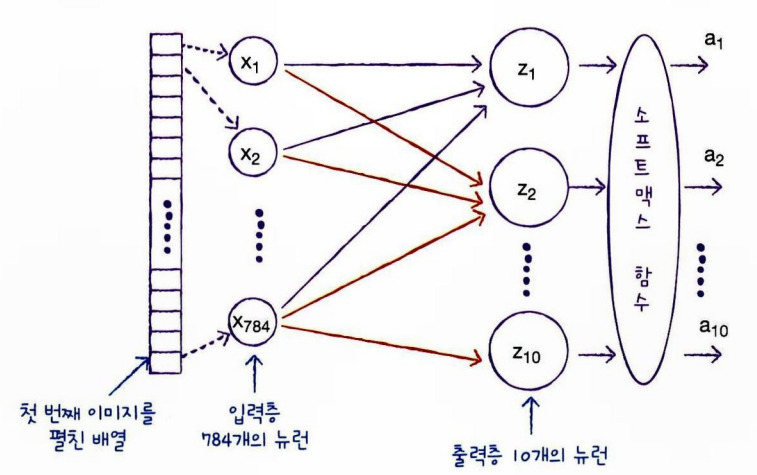

[활성화 함수]  
: 소프트맥스와 같이 뉴런의 선형 방정식 계산 결과에 적용되는 함수  

[케라스 모델 훈련 전 설정]  
- 손실 함수의 종류  
> 이진 분류: loss = 'binary_crossentropy'  
> 다중 분류: loss = 'categorical_crossentropy'  
- 훈련 과정에서 계산하고 싶은 측정값 지정  

In [27]:
print(train_target[:10]) # 타깃 값 확인

[7 3 5 8 6 9 3 3 9 9]


In [25]:
model.compile(loss='sparse_categorical_crossentropy',metrics=['accuracy'])

다중 분류에서 크로스 엔트로피 손실 함수를 사용하려면 정수로된 타깃값을 원-핫 인코딩으로 변환해야 함  
> 이 과정을 생략하고 정수로된 타깃값 그대로 사용해 계산할 수 있는 방법   
    = 손실함수를 loss='sparse_categorical_crossentropy'로 지정

metrics 매개변수에 정확도 지표를 의미하는 'accuracy' 지정  
> metrics 매개변수에는 여러 개의 지표를 지정할 수 있으며, 하나의 지표를 지정할 때도 꼭 리스트로 전달해야 함

In [28]:
# 모델 훈련
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7409 - loss: 0.7725
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8387 - loss: 0.4802
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8454 - loss: 0.4561
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8494 - loss: 0.4429
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8541 - loss: 0.4265


에포크마다 손실(loss), 정확도(accuracy) 출력됨

In [29]:
# 모델 성능 평가
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8448 - loss: 0.4439


[0.45147842168807983, 0.8455833196640015]

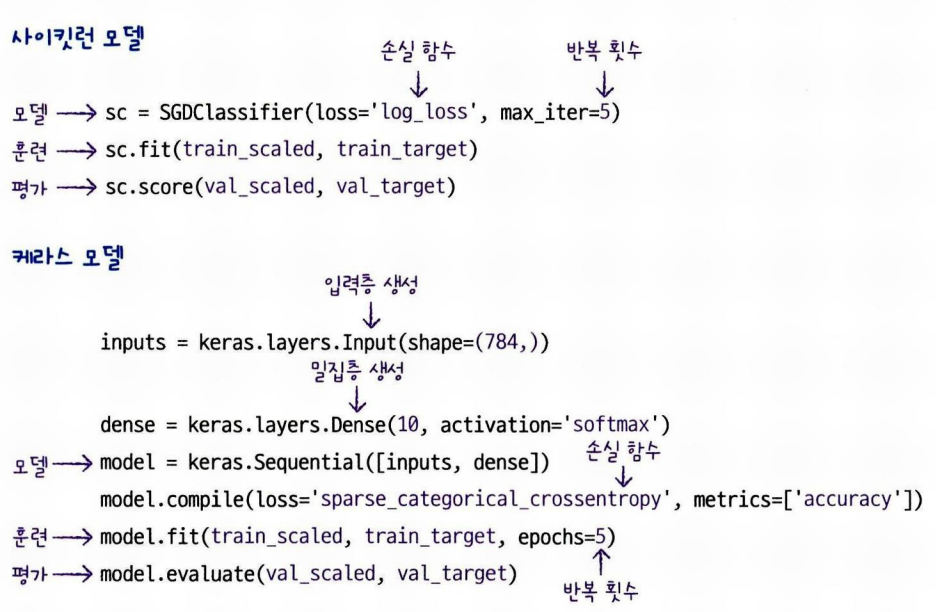